In [2]:
import sys, getopt
#import cpickle as pickle

import argparse

import sys
import os
import time

import numpy as np

from PIL import Image

import lasagne
import nolearn
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot  as pyplot

plt.style.use('ggplot')

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla P100-PCIE-16GB (CNMeM is disabled, cuDNN 5105)


In [13]:
fnp = np.load('./Miscellaneous/exp_SR_wo-UL_250117.npz')
print(fnp.keys())

['TensorAceTrain_s', 'OptAccTrain_s', 'OptAceTrain_s', 'TensorMseTrain_ns', 'ArrayAccTest', 'OptMseValid_s', 'TensorAccValid_s', 'OptNbSample_ns', 'OptNbEpoch_ns', 'OptNbEpoch_s', 'OptMseValid_ns', 'OptAccValid_s', 'OptMseTrain_ns', 'OptNbSample_s', 'TensorAceValid_s', 'ArrayAceTest', 'TensorMseValid_s', 'OptAceValid_s', 'TensorMseValid_ns', 'ArrayMseTest']


In [14]:
AccTest = getattr( fnp.f, 'ArrayAccTest').T
AceTest = getattr( fnp.f, 'ArrayAceTest').T
MseTest = getattr( fnp.f, 'ArrayMseTest').T

In [18]:
labcols=[100,90,80,70,60,50,40,30,20,10,0]
dfAccTest = pd.DataFrame( AccTest, columns=labcols )
dfAceTest = pd.DataFrame( AceTest, columns=labcols )
dfMseTest = pd.DataFrame( MseTest, columns=labcols )

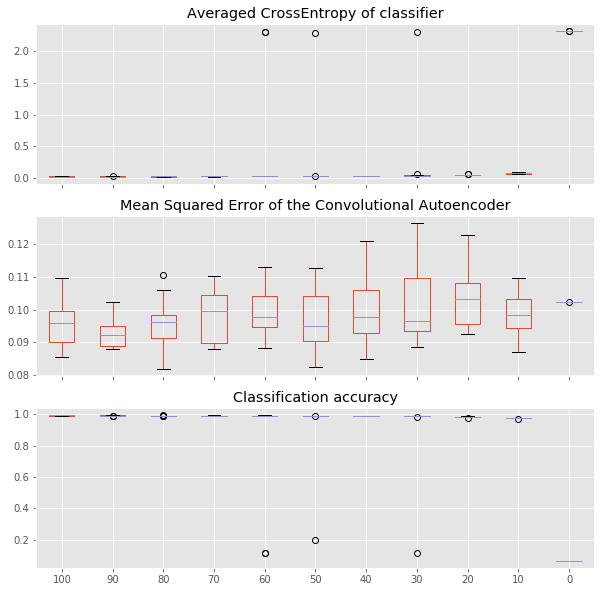

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10), sharey=False, sharex=True)
dfAccTest.plot.box(ax=axes[2], title='Classification accuracy')
dfAceTest.plot.box(ax=axes[0], title='Averaged CrossEntropy of classifier')
dfMseTest.plot.box(ax=axes[1], title='Mean Squared Error of the Convolutional Autoencoder')
plt.show()

In [5]:
genRanImg = np.zeros([1000,1000])
imgSizeX = 304
imgSizeY = 128


In [7]:
p = np.random.choice( genRanImg , replace=False) 


ValueError: a must be 1-dimensional

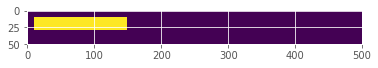

In [64]:
sizeX = 50
sizeY = 500
I = np.zeros(sizeX*sizeY)
seqA = np.arange(10,30)
seqB = np.arange(10,150)
for x in seqA:
    for y in seqB:
        pos =(x)*sizeY+(y)
        #print(x, y, pos, (pos-(pos%sizeY))/sizeY,(pos%sizeY) )
        I[pos] = 255
plt.imshow(I.reshape(sizeX,sizeY))
plt.show()

In [16]:
np.arange(1,15)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [35]:
I[1409] = 0